In [2]:
import requests
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

requestURL = "https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/ideal-weight/ideal_weight.csv"

df = pd.read_csv(requestURL)
df.columns = ['id','sex','actual','ideal','diff']
df.sex = df.sex.map(lambda x: x.replace("'",""))
df.set_index('id')
df.head(15)

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10
5,5,Male,155,170,-15
6,6,Male,155,155,0
7,7,Female,114,110,4
8,8,Female,135,135,0
9,9,Male,180,171,9


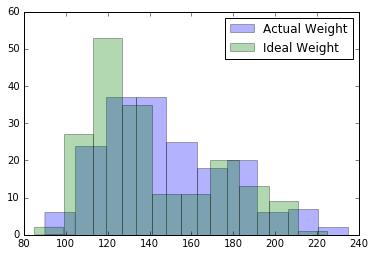

In [3]:
plt.hist(df['actual'], label='Actual Weight', alpha=0.3)
plt.hist(df['ideal'], label='Ideal Weight', alpha=0.3)
plt.legend()

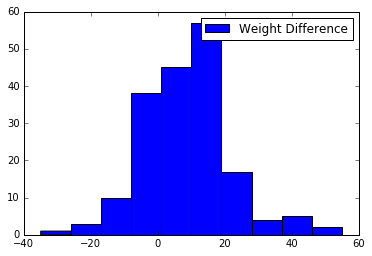

In [4]:
plt.hist(df['diff'], label='Weight Difference')
plt.legend()

In [5]:
cat_sex = preprocessing.LabelEncoder()
df.cat_sex = cat_sex.fit_transform(df.sex)
female = df.sex[df.cat_sex == 0]
male = df.sex[df.cat_sex == 1]

print("There are %s females in the data set" % female.count())
print("There are %s males in the data set" % male.count())

There are 119 females in the data set
There are 63 males in the data set


In [8]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
data = df[['actual','ideal','diff']]
target = df['sex']
model = clf.fit(data, target)
y_pred = model.predict(data)

In [9]:
d = {'actual': 145, 'ideal': 160, 'diff': -15}
weightData = pd.DataFrame(data=d, index=[1])
pred = model.predict(weightData)
print(pred)

['Male']


In [10]:
d = {'actual': 160, 'ideal': 145, 'diff': 15}
weightData = pd.DataFrame(data=d, index=[1])
pred = model.predict(weightData)
print(pred)

['Male']
